# Coursework 3

Complete both tasks, using either a notebook or a Python script. Marks will be given for

* Correct implementation of algorithms to solve the tasks (10/20)
* Complete documentation of code, especially functions, and discussion of results (6/20)
* Unit tests and/or code robustness through eg assertions, as appropriate (4/20)

In [1]:
import numpy
from scipy.integrate import quad
from matplotlib import pyplot

## Stochastic Differential Equations - Ornstein-Ühlenbeck problem

Consider the Ornstein-Uhlenbeck problem
$$
  \text{d}X = -\lambda X \, \text{d}t + \mu \, \text{d}W.
$$

Its solution is
$$
  X(t) = e^{-\lambda t} X_0 + \mu \int_0^t e^{-\lambda (t - s)} \, \text{d}W(s).
$$

In addition, we can calculate $\mathbb{E}(X)$ and $\mathbb{E}(X^2)$ as
$$
\begin{align}
  \mathbb{E}(X) & = e^{-\lambda t} X_0, \\
  \mathbb{E}(X^2) & = e^{-2\lambda t} X_0^2 + \frac{\mu^2}{2 \lambda} \left( 1 - e^{-2 \lambda t} \right).
\end{align}
$$
In particular we can show that
$$
  \lim_{t \to \infty} X \sim N \left( 0, \frac{\mu^2}{2 \lambda} \right):
$$
that is, for late enough time the solution follows a normal distribution.

### Tasks

1. Solve the Ornstein-Ühlenbeck problem using the Euler-Maruyama method. Use $X_0 = 1, \lambda=1, \mu=1$ and solve to end time $T=1$. Using $\delta t = 2^{- \left(4, \dots, 10\right)}$ check the weak order of convergence by looking at the error in $X^2$.
2. Plot a histogram of $X(10)$ for $10^5$ realizations with $\delta t = 2^{-7}$, using Euler-Maruyama. How is it distributed?
3. By computing the mean of $X^2(T)$ (which is the variance), check that 
$$
  X^{(h)}(T) \sim N \left( 0, \frac{\mu^2}{2 \lambda - \lambda^2 \, \delta t} \right)
$$
for $T=10$ (which is meant to represent "large" $T$).
4. Repeat these steps for the theta method
$$
  X_{n+1} = X_n - \lambda \, \delta t \, \theta X_{n+1} - \lambda \, \delta t \, (1 - \theta) X_n + \mu \, \text{d}W_n
$$
for $\theta=1/2$. Why is it different?

In [172]:
def x_exact(X0, t_range, l, u, dW):
    X = numpy.zeros_like(dW)
    dw0 = dW[0]
    for i, dw in enumerate(dW):
        X[i] = numpy.exp(-l * t_range[i]) * X0 + u / l * (dw - numpy.exp(-l * t_range[i]) * dw0)
        
    return X

In [ ]:
def f(t, dw, i, l):
    

In [144]:
def EM(X0, t_range, l, u, dW):
    X = numpy.zeros_like(dW)
    X[0] = X0
    dt = t_range[1] - t_range[0]
    W = numpy.zeros(dW.shape[0])
    
    for i, dw in enumerate(dW[:-1]):
        X[i+1] = X[i] - l * X[i] * dt * t_range[i] + u * dw
        W[i+1] = W[i] + dw
        
    return X, W

In [4]:
def init_vals():
    X0 = 1
    l = 1
    u = 1
    T = 1
    return X0, l, u, T

In [6]:
def EX2(X0, t_range, l, u, dW):
    E = numpy.zeros_like(dW)
    E = numpy.exp(-2 * l * t_range) * X0 * X0 + u * u / (2 * l) * (1 - numpy.exp(-2 * l * t_range))
    return E

In [7]:
def weak(n, m):
    X0, l, u, T = init_vals()
    N = 2**n
    dt = T/N
    DT = numpy.sqrt(dt)
    t_range = numpy.linspace(dt, T, N)
    E_n = 0
    E_e = 0
    for i in range(m):
        dW = numpy.random.randn(N) * DT

        X, W = EM(X0, t_range, l, u, dW)
        x_e = x_exact(X0, t_range, l, u, dW)
        E_n += abs(X[-1])
        E_e += abs(x_e[-1])
    
    E = abs(E_e - E_n) / m
    return E

In [8]:
def plot_conver(Ninit, Nfinal, m):
    n = Nfinal - Ninit + 1
    E = numpy.zeros(n)
    h = numpy.zeros(n)
    for i in range(n):
        E[i] = weak(i + Ninit, m)
        h[i] = 1/2**(i + Ninit)
        print(i)
    return E, h

In [171]:
E, h = plot_conver(4, 10, 500)
print(E, h)

0
1
2
3
4
5
6
[ 0.38671385  0.4059906   0.40817472  0.39517312  0.41324051  0.40316802
  0.40142717] [ 0.0625      0.03125     0.015625    0.0078125   0.00390625  0.00195312
  0.00097656]


In [ ]:

grad, e_pow = numpy.polyfit(numpy.log(h), numpy.log(E), 1)
conv = numpy.exp(e_pow) * h**grad
print(grad, conv)

-0.164305295904 [ 0.00525293  0.00588657  0.00659665  0.00739238  0.00828409  0.00928337
  0.01040319]


In [ ]:
pyplot.loglog(h, E, 'kx')

In [9]:
x_exact(1, t_range, 1, 1, dW)**2

NameError: name 't_range' is not defined

In [179]:
X0, l, u, T = init_vals()
N = 2**10
dt = T/N
DT = numpy.sqrt(dt)
t_range = numpy.linspace(dt, T, N)
dW = numpy.random.randn(N) * DT
dW
EM(X0, t_range, l, u, dW)[0][-1]**2

6.1921154104221401

In [180]:
x_exact(X0, t_range, l, u, dW)[-1]**2

0.14150582126056563

In [143]:
EX2(X0, t_range, l, u, dW)[-1]

0.56766764161830641

## Self consistent fields - Water

Perform the self-consistent field calculation for a water molecule, $\text{H}_2\text{O}$.

### Parameters

The locations of the atoms are:

In [2]:
import numpy
R_O = [0.0, 1.809*numpy.cos(104.52/180.0*numpy.pi/2.0), 0.0]
R_H1 = [-1.809*numpy.sin(104.52/180.0*numpy.pi/2.0), 0.0, 0.0]
R_H2 = [+1.809*numpy.sin(104.52/180.0*numpy.pi/2.0), 0.0, 0.0]

The nuclear repulsion energy is:

In [3]:
Vnn = 8.90770810

The overlap matrix is:

In [4]:
S = numpy.array([[ 1.       ,  0.2367039,  0.       ,  0.       , -0.       ,
         0.0500137,  0.0500137],
       [ 0.2367039,  1.       ,  0.       ,  0.       , -0.       ,
         0.4539953,  0.4539953],
       [ 0.       ,  0.       ,  1.       ,  0.       ,  0.       ,
         0.       ,  0.       ],
       [ 0.       ,  0.       ,  0.       ,  1.       ,  0.       ,
         0.2927386, -0.2927386],
       [-0.       , -0.       ,  0.       ,  0.       ,  1.       ,
         0.2455507,  0.2455507],
       [ 0.0500137,  0.4539953,  0.       ,  0.2927386,  0.2455507,
         1.       ,  0.2510021],
       [ 0.0500137,  0.4539953,  0.       , -0.2927386,  0.2455507,
         0.2510021,  1.       ]])

The core Hamiltonian is:

In [5]:
H = numpy.array([[ -3.26850823e+01,  -7.60432270e+00,   0.00000000e+00,
          0.00000000e+00,  -1.86797000e-02,  -1.61960350e+00,
         -1.61960350e+00],
       [ -7.60432270e+00,  -9.30206280e+00,   0.00000000e+00,
          0.00000000e+00,  -2.22159800e-01,  -3.54321070e+00,
         -3.54321070e+00],
       [  0.00000000e+00,   0.00000000e+00,  -7.43083560e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         -7.56702220e+00,   0.00000000e+00,  -1.89085610e+00,
          1.89085610e+00],
       [ -1.86797000e-02,  -2.22159800e-01,   0.00000000e+00,
          0.00000000e+00,  -7.52665570e+00,  -1.65878930e+00,
         -1.65878930e+00],
       [ -1.61960350e+00,  -3.54321070e+00,   0.00000000e+00,
         -1.89085610e+00,  -1.65878930e+00,  -4.95649010e+00,
         -1.56026360e+00],
       [ -1.61960350e+00,  -3.54321070e+00,   0.00000000e+00,
          1.89085610e+00,  -1.65878930e+00,  -1.56026360e+00,
         -4.95649010e+00]])

The number of electrons is:

In [6]:
Nelectrons = 10

The two electron integrals are given in the data file:

In [7]:
G=numpy.fromfile('./H2O-two-electron.dat')
G = numpy.reshape(G,(7,7,7,7));

### Plotting

There is useful information contained in the basis functions. The calculations here used the *STO-3G* basis, which are Gaussians with carefully chosen coefficients. There is one basis function per atomic orbital: so one for each hydrogen (the "1s" orbital) and five for the oxygen (one for the "1s" orbital, one for the "2s" orbital, and three for the "2p" orbitals - one for each Cartesian direction, associated with the quantum spins). Each basis function is written
$$
  \tilde{\chi} (r) = \sum_{i=1}^3 c_{i} \left( \frac{2 \alpha_i}{\pi} \right)^{3/4} e^{-\alpha_i r^2},
$$
where $r$ is the distance to the nucleus of this particular atom, and the $c_i, \alpha_i$ coefficients depend on the atom and the orbital.

For the "1s" orbitals the values of the coefficients are
$$
\begin{align}
  c_1 &= 0.444635, & c_2 &= 0.535328, & c_3 &= 0.154329, \\
  \alpha_1 &= 0.109818 \zeta_1^2, & \alpha_2 &= 0.405771 \zeta_1^2, & \alpha_3 &= 2.22766 \zeta_1^2.
\end{align}
$$
Here $\zeta_1 = 1.24$ for hydrogen and $\zeta_1 = 7.66$ for oxygen.

For the "2s" orbital the coefficients are
$$
\begin{align}
  c_1 &= 0.700115, & c_2 &= 0.399513, & c_3 &= -0.0999672, \\
  \alpha_1 &= 0.0751386 \zeta_2^2, & \alpha_2 &= 0.231031 \zeta_2^2, & \alpha_3 &= 0.994203 \zeta_2^2.
\end{align}
$$
Here $\zeta_2 = 2.25$ for oxygen.

Finally, for the "2p" orbital, the coefficients are
$$
\begin{align}
  c_1 &= 0.391957, & c_2 &= 0.607684, & c_3 &= 0.1559163, \\
  \alpha_1 &= 0.0751386 \zeta_2^2, & \alpha_2 &= 0.231031 \zeta_2^2, & \alpha_3 &= 0.994203 \zeta_2^2.
\end{align}
$$

In the above matrices, the seven entries correspond to:
$$
\begin{align}
  0 &: \text{Oxygen, 1s}, \\
  1 &: \text{Oxygen, 2s}, \\
  2 &: \text{Oxygen, 2p (x)}, \\
  3 &: \text{Oxygen, 2p (y)}, \\
  4 &: \text{Oxygen, 2p (z)}, \\
  5 &: \text{Hydrogen (1), 1s}, \\
  6 &: \text{Hydrogen (2), 1s}.
\end{align}
$$

### Constructing the full molecular orbitals

Given these basis functions, the single orbital molecular orbitals can be constructed as
$$
  \chi_i = \sum_{\mu=1}^K C_{i\mu} \tilde{\chi}_{\mu}.
$$
The iso-surfaces of the molecular orbitals give useful information about the reaction properties of the molecule.

### Tasks

1. Compute the total energy using the self-consistent field method. Ensure that your code prints the energy to the screen and returns the basis coefficients $C$ for later use.
2. Construct the molecular orbitals and plot isocontours of each in the $x-y$ plane.

In [8]:
def transf_matrix(S):
    Delta, U = numpy.linalg.eig(S)
    Delta = numpy.diag(Delta**(-1/2))
    X = numpy.dot(U, numpy.dot(Delta, numpy.conj(U).T))
    return X

In [9]:
def density_matrix(C, N):
    N_e = int(numpy.around(N/2+0.49))
    uv, n = C.shape
    D = numpy.zeros([uv, uv])
    for u in range(uv):
        for v in range(uv):
            for j in range(N_e):
                D[u, v] += 2 * C[u, j] * C[v, j]
    return D


In [28]:
def fock_matrix(H, G, D):
    miu, niu = H.shape
    alpha, beta = D.shape
    F = numpy.copy(H)
    for u in range(miu):
        #for v in range(miu):
        #for v in range(niu):
        #    F[u, v] = numpy.sum((G[u, v, :, :] - G[u, :, :, v].T * 0.5) * D)
            
        for v in range(miu):
            for alpha in range(miu):
                for beta in range(miu):
                    F[u, v] += (G[u, v, alpha, beta] -
                                  0.5 * G[u, beta, alpha, v]) * D[alpha,
                                                                    beta]
                    
    #F += H
    return F

In [29]:
def orb_energya(F, X):
    #ener, V = numpy.linalg.eigh(F)
    F_p = numpy.dot(numpy.conj(X).T, numpy.dot(F, X))  
    epsilon, V = numpy.linalg.eigh(F_p)
    
    ID = numpy.argsort(epsilon)
    epsilon = epsilon[ID]
    V = V[:, ID]
    C = numpy.dot(X, V)
    
    return epsilon, C#numpy.dot(X, V)


In [30]:
def D_new(X, H, G, C, D, N):
    F = fock_matrix(H, G, D)
    OE, C = orb_energya(F, X)
    D = density_matrix(C, N)
    return D, C, OE

In [31]:
def give_me_ma_energy(D, H, F, Vnn):
    return numpy.sum(D * (H + F)) / 2.0 + Vnn

In [32]:
def hartrees(S, H, G, Vnn, C, tol = 1e-10):
    N = Nelectrons
    X = transf_matrix(S)
    D = density_matrix(C, N)
    error = 10.0
    i = 0
    while error > tol:
        if error > tol:
            D_old = D
            X = transf_matrix(S)
            D, C, OE = D_new(X, H, G, C, D, N)
            error = numpy.sum(abs(D - D_old))
            #D = D_n
            i+=1
            if i>10000:
                break
    F = fock_matrix(H, G, D)
    E = give_me_ma_energy(D, H, F, Vnn)
    print("Converged to a value of E = %r in %r iterations with a tolerance "
          "of %r" % (E, i-1, error))
    return give_me_ma_energy(D, H, F, Vnn), C

In [33]:
C = numpy.zeros((7, 7))
Energy, C = hartrees(S, H, G, Vnn, C, tol=1e-13)

Converged to a value of E = -74.965901060149179 in 39 iterations with a tolerance of 9.7438894266272838e-14


In [34]:
print("The total energy of the self contained field is {}.".format(Energy))
print("The C matrix is: \n C = \n{}.".format(C))

The total energy of the self contained field is -74.96590106014918.
The C matrix is: 
 C = 
[[ -9.94216113e-01  -2.33759162e-01   1.36349265e-15  -1.04048978e-01
   -1.92161682e-16  -1.25835897e-01  -3.92047506e-16]
 [ -2.58496205e-02   8.44396663e-01  -6.66133815e-15   5.38240140e-01
    8.91584688e-16   8.20344352e-01   2.74780199e-15]
 [  1.53962937e-19  -5.64413164e-17  -6.13987702e-16   2.10903903e-15
   -1.00000000e+00  -3.84351772e-19  -1.65310491e-16]
 [  2.42861287e-16  -2.77555756e-17   6.12709764e-01   6.25888230e-15
   -2.06748235e-16   2.67841305e-15  -9.59851297e-01]
 [ -4.16576583e-03   1.22891080e-01   9.65894031e-15  -7.55881905e-01
   -1.78494626e-15   7.63598631e-01   2.72004641e-15]
 [  5.58518679e-03   1.55605150e-01   4.49219057e-01  -2.95059588e-01
   -7.13695596e-16  -7.69244378e-01   8.14766242e-01]
 [  5.58518679e-03   1.55605150e-01  -4.49219057e-01  -2.95059588e-01
    1.37252549e-16  -7.69244378e-01  -8.14766242e-01]].


In [35]:
def get_points(side, points):
    points += 1
    dims = numpy.linspace(-side, side, points)
    grid = numpy.zeros((points, points, 3))
    for i in range(points):
        for j in range(points):
            grid[j, i, 0] = dims[i]
            grid[j, i, 1] = dims[j]
            grid[j, i, 2] = 0
    return grid

In [36]:
def make_coeff():
    swiggle1_O = 7.66
    swiggle1_H = 1.24
    swiggle2_O = 2.25
    
    coeff_H = numpy.array([[0.444635, 0.535328, 0.154329], 
                           [0.109818, 0.405771, 2.22766]])
    
    coeff_O = numpy.array([[[0.444635, 0.535328, 0.154329], 
                           [0.109818, 0.405771, 2.22766]],
                           
                          [[0.700115, 0.399513, -0.0999672],
                           [0.0751386, 0.231031, 0.994203]],
                           
                          [[0.391957, 0.607684, 0.1559163],
                           [0.0751386, 0.231031, 0.994203]]])
    
    coeff_H[1] *= swiggle1_H**2
    coeff_O[0, 1] *= swiggle1_O**2
    coeff_O[1, 1] *= swiggle2_O**2
    coeff_O[2, 1] *= swiggle2_O**2
    return [coeff_H, coeff_O]

In [37]:
def CHI_bar(coeff, r):
    return (coeff[0] * (2 * coeff[1] / numpy.pi)**0.75 * numpy.exp(-coeff[1] * r * r)).sum()

In [38]:
def CHI_miu(coeff, xy):
    X = numpy.zeros(7)
    r_o = numpy.linalg.norm(xy - R_O)
    r_h1 = numpy.linalg.norm(xy - R_H1)
    r_h2 = numpy.linalg.norm(xy - R_H2)
    X[0] = CHI_bar(coeff[1][0], r_o)
    X[1] = CHI_bar(coeff[1][1], r_o)
    X[2] = CHI_bar(coeff[1][2], r_o)
    X[3] = CHI_bar(coeff[1][2], r_o)
    X[4] = CHI_bar(coeff[1][2], r_o)
    X[5] = CHI_bar(coeff[0], r_h1)
    X[6] = CHI_bar(coeff[0], r_h2)
    
    return X

In [39]:
def CHI_matrix(C, side, points):
    grid = get_points(side, points)
    print(grid.shape)
    X = numpy.zeros((points+1, points+1, 7))
    coeff = make_coeff()
    
    for i in range(points+1):
        for j in range(points+1):
            X_miu = CHI_miu(coeff, grid[i,j])
            for k in range(X_miu.shape[0]):
                X[i,j, k] = (C[k] * X_miu).sum()
    
    return X 

In [40]:
X = CHI_matrix(C, 5, 100)

(101, 101, 3)


In [41]:
x = numpy.linspace(-5, 5, 101)
y = x

In [42]:
%matplotlib notebook 

<IPython.core.display.Javascript object>


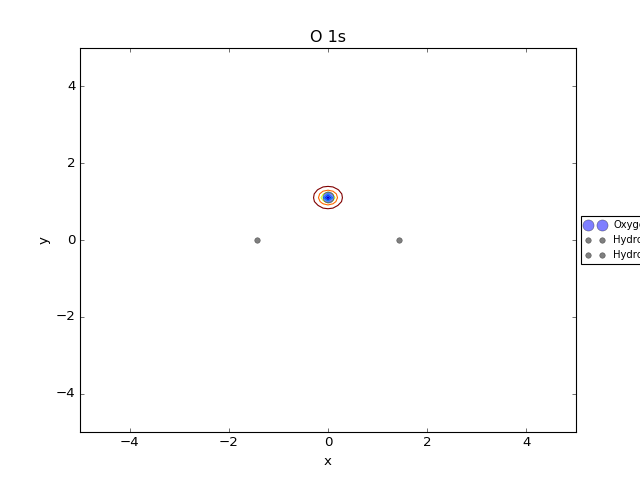

<IPython.core.display.Javascript object>


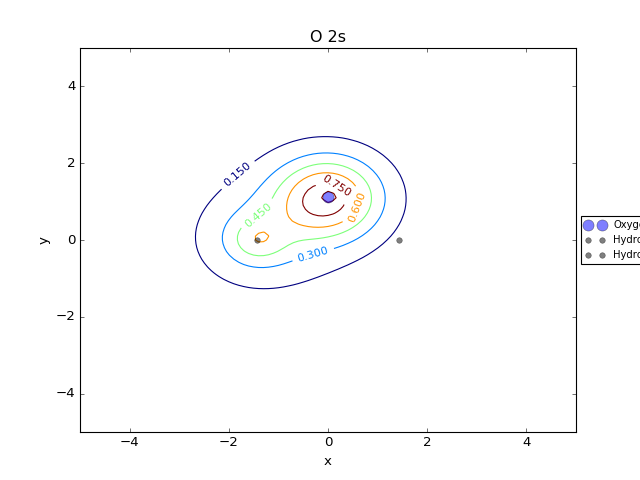

<IPython.core.display.Javascript object>


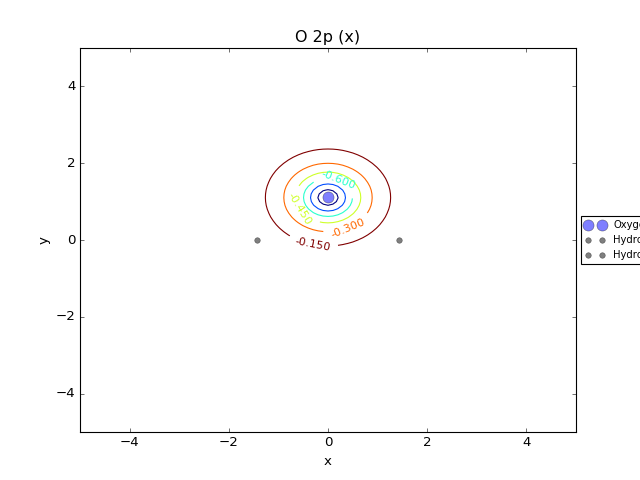

<IPython.core.display.Javascript object>


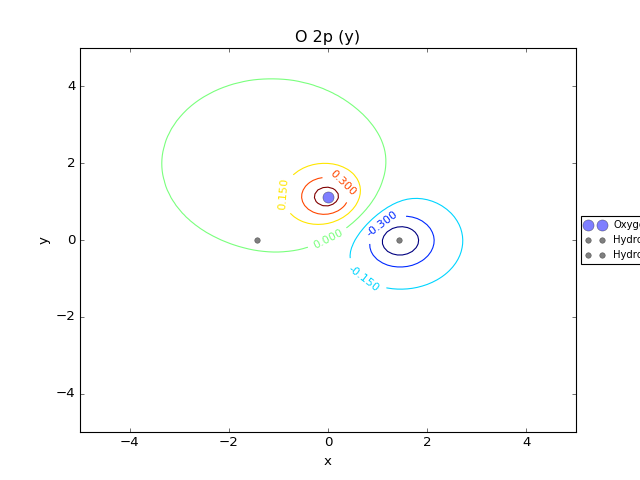

<IPython.core.display.Javascript object>


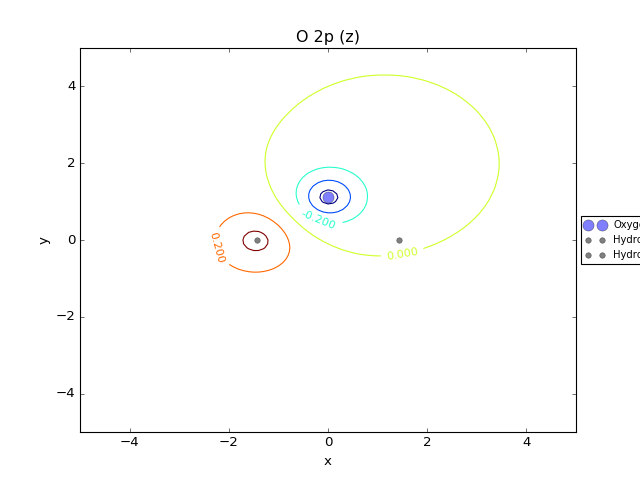

<IPython.core.display.Javascript object>


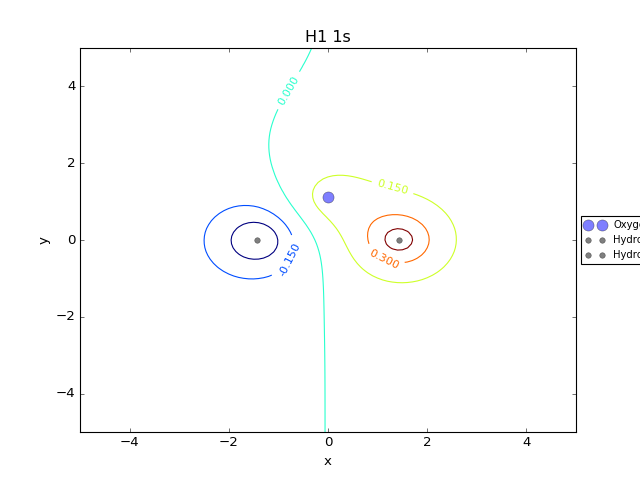

<IPython.core.display.Javascript object>


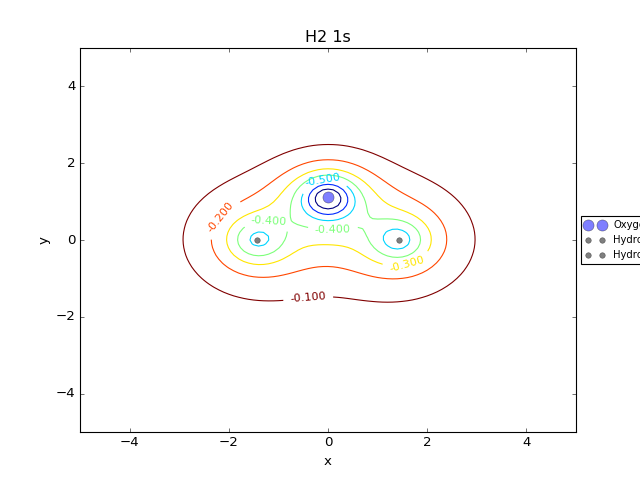

In [44]:
from matplotlib import pyplot
labels = ['O 1s', 'O 2s', 'O 2p (x)', 'O 2p (y)',
          'O 2p (z)', 'H1 1s', 'H2 1s']

for i in range(C.shape[0]):
    fig = pyplot.figure()
    ax = fig.add_subplot(111)
    contoor = ax.contour(x, y, X[:,:,i])
    ax.plot(R_O[0],R_O[1],'bo',ms=10,lw=1,label='Oxygen',alpha=0.5)
    ax.plot(R_H1[0],R_H1[1],'ko',ms=5,lw=1,label='Hydrogen 1',alpha=0.5)
    ax.plot(R_H2[0],R_H2[1],'ko',ms=5,lw=1,label='Hydrogen 2',alpha=0.5)
    ax.clabel(contoor, inline=1, fontsize=10)
    ax.legend(fontsize=9,loc='center left',bbox_to_anchor=[1,0.5])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(labels[i])
    fig.savefig('./pt{}.png'.format(i))